In [2]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline 

import seaborn as sns

In [4]:
df = pd.read_csv('real_estate_data.csv')

In [5]:
#Drop duplicates
df = df.drop_duplicates()

In [6]:
# Display unique values of 'basement'
df.basement.unique()

array([nan,  1.])

In [7]:
# Missing basement values should be 0
df['basement'] = df.basement.fillna(0)

In [8]:
df.basement.unique()

array([0., 1.])

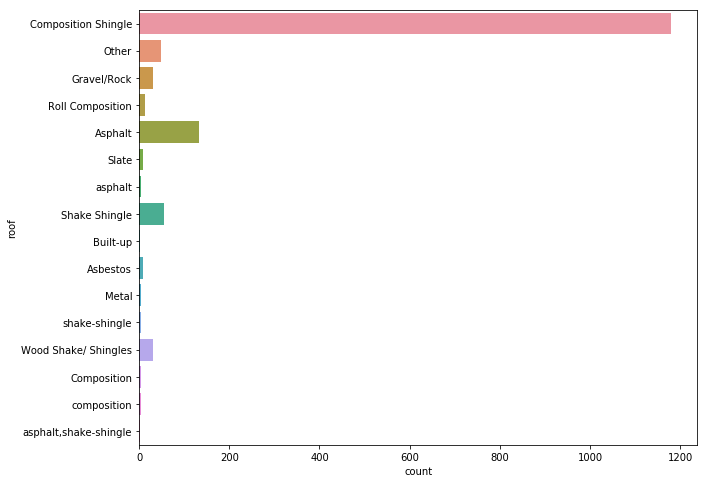

In [12]:
# Class distributions for 'roof'
plt.figure(figsize=(10,8))
sns.countplot(y='roof', data=df)

In [13]:
df.dtypes[df.dtypes=='object']

property_type     object
exterior_walls    object
roof              object
dtype: object

In [14]:
# 'composition' should be 'Composition'
df.roof.replace('composition', 'Composition', inplace=True)

# 'asphalt' should be 'Asphalt'
df.roof.replace('asphalt', 'Asphalt', inplace=True)

# 'shake-shingle' and 'asphalt,shake-shingle' should be 'Shake Shingle'
df.roof.replace(['shake-shingle', 'asphalt,shake-shingle'], 'Shake Shingle', inplace=True)

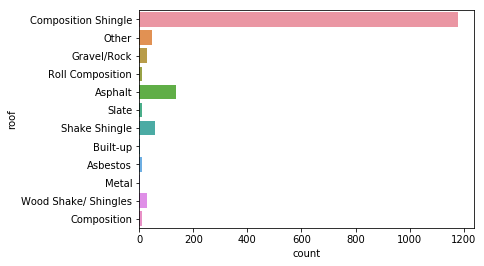

In [15]:
sns.countplot(y='roof',data=df)

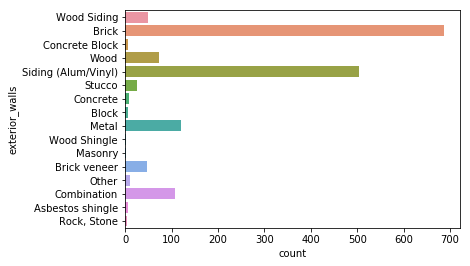

In [16]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls', data=df)

In [23]:
# 'Rock, Stone' should be 'Masonry'
df.exterior_walls.replace('Rock, Stone', 'Masonry', inplace=True)

In [24]:
# 'Concrete' and 'Block' should be 'Concrete Block'
df.exterior_walls.replace(['Concrete','Block'],'Concrete Block',inplace=True)

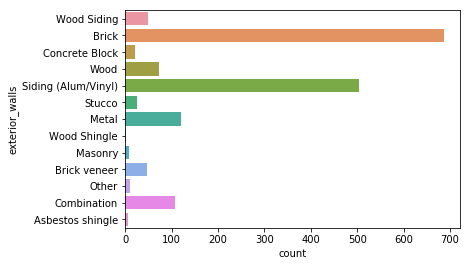

In [25]:
# Class distributions for 'exterior_walls'
sns.countplot(y='exterior_walls',data=df)

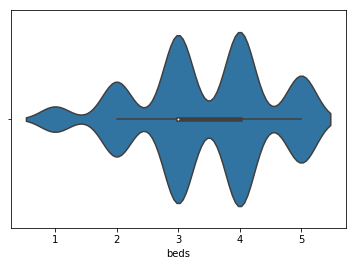

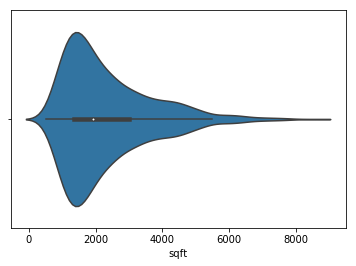

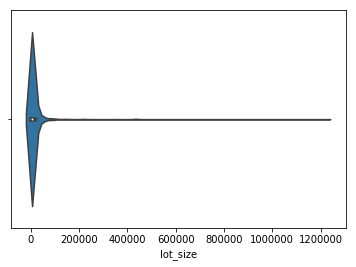

In [26]:
# Violin plot of beds
sns.violinplot(df.beds)
plt.show()

# Violin plot of sqft
sns.violinplot(df.sqft)
plt.show()

# Violin plot of lot_size
sns.violinplot(df.lot_size)
plt.show()

In [29]:
# Sort df.lot_size and display the top 5 samples
df.lot_size.sort_values(ascending=False).head()

102     1220551
1111     436471
1876     436035
1832     436035
1115     435600
Name: lot_size, dtype: int64

In [48]:
# Remove lot_size outliers
df = df[df.lot_size <= 500000]

# print length of df
print( len(df) )

1882


In [49]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls      0
roof              353
dtype: int64

In [50]:
# Fill missing values in exterior_walls with 'Missing'
df['exterior_walls'] = df['exterior_walls'].fillna('Missing')


C:\Users\Cybeee\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [53]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type       0
exterior_walls      0
roof              353
dtype: int64

In [56]:
# Fill missing categorical values
for column in df.select_dtypes(include=['object']):
    df[column] = df[column].fillna('Missing')

In [58]:
# Display number of missing values by feature (categorical)
df.select_dtypes(include=['object']).isnull().sum()

property_type     0
exterior_walls    0
roof              0
dtype: int64

In [59]:
# Display number of missing values by feature (numeric)
df.select_dtypes(exclude=['object']).isnull().sum()

tx_price              0
beds                  0
baths                 0
sqft                  0
year_built            0
lot_size              0
basement              0
restaurants           0
groceries             0
nightlife             0
cafes                 0
shopping              0
arts_entertainment    0
beauty_spas           0
active_life           0
median_age            0
married               0
college_grad          0
property_tax          0
insurance             0
median_school         0
num_schools           0
tx_year               0
dtype: int64

In [60]:
# Save cleaned dataframe to new file
df.to_csv('cleaned_df.csv', index=None)